# Увод у теорију грешака
<div>
   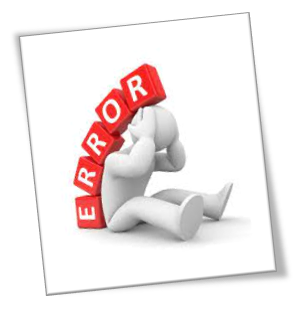
</div>

> *"Perfection is a polished collection of errors."*
<p style="text-align:center"> 
Марио Бенедети (Mario Benedetti) (1920 - 2005) уругвајски писац
</p>    

Садржај:
1. [Грешке основних рачунских операција](#Грешке-основних-рачунских-операција)
1. [Карактеристике нумеричких типова у Python-у](#Карактеристике-нумеричких-типова-у-Python-у)
1. [Карактеристике нумеричких типова у NumPy-у](#Карактеристике-нумеричких-типова-у-NumPy-у)

In [1]:
import sys   #modul sadrzi funkcije i promenljive koje koristi Python interpretator, tj. sistemske funkcije i podatke
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt

Алгоритми којима се бавимо су нумерички алгоритми и подразумевају прелаз из рада са целим бројевима у домен података у покретном зарезу, као што су `float` или `complex`. Ова наизглед  безазлена транзиција разбија интуицију стечену у аритметици са целим бројевима. Неопходно је прилагодити начин размишљања о основним аритметичким операцијама, дизајну и имплементацији алгоритама. Нумерички алгоритми у покретном зарезу не доводе увек до тачног решења, чак ни до приближног. Карактеристике алгоритма о којима се води рачуна су операцијска сложеност и меморијска комплексност, али оне нису једине примарне. Тачност као квалитет резултата постаје веома важна додатна карактеристика. Због тога, чак и основне технике дизајна захтевају пажљиву анализу компромиса између времена извршења, грешке апроксимације, и других фактора. С тим у вези на почетку анализирамо неке од фактора који утичу на квалитет нумеричких алгоритама као начине процене квалитета.

## Грешке основних рачунских операција 

**Дефиниција 1.** За реалну вредност $a$ апроксимација је нека вредност $x\in\mathbb{R}.$ Грешка апроксимације је разлика
$$\varepsilon_{a}=x-a.$$ 
Апсолутна грешка апроксимације је 
$$\Delta a=|x-a|=|\varepsilon_a|.$$
Релативна грешка је тада 
$$\delta a=\dfrac{\Delta a}{|a|}=\dfrac{|x-a|}{|a|}.$$

Апсолутна грешка се обично изражава у јединицама апроксимиране величине, док се релативна грешка као безимена величина врло често изражава у процентима. Апсолутна грешка даје меру одступања приближне вредности $x$ од $a,$ док релативна грешка показује меру колико је то одступање битно у односу на апроксимирану величину $a.$ 

Приметимо да израз за релативну грешку $\delta a=\dfrac{|x-a|}{|a|}$ није дефинисан за $a=0.$ Другим речима, у односу на $a=0$ посматармо само апсолутно одступање апроксимације $x.$ Због тога се веома често користи еквивалентан опис релативне грешке:
 $$\delta a=|r|\quad \mbox{ је релативна грешка уколико је }\quad x=a(1+r).$$

**Пример 1.** Колико износе апсолутна и релативна грешка при заокруживању броја $34.997$ на $35?$ Резултат апсолутне грешке приказаћемо са прецизношћу од три децимална места с обзиром да је то прецизност улазних података.

In [2]:
'{:.3f}'.format(35-34.997)  #apsolutna greska

'0.003'

In [3]:
(35-34.997)/34.997  #relativna greska

8.572163328285606e-05

Релативна грешка се најчешће изражава у процентима.

In [4]:
'{:%}'.format((35-34.997)/34.997*100)

'0.857216%'

***

Релативна грешка није осетљива на скалирање вредности. 
$$a\mapsto\alpha a\mbox{ и } x\mapsto\alpha x\quad\Longrightarrow\quad \delta a=\dfrac{|a-x|}{|a|}=\dfrac{|\alpha a-\alpha x|}{|\alpha a|}=\delta(\alpha a). $$
Самим тим релативна грешка као процена квалитета није осетљива на ред величине апроксимиране вредности.

У реалним ситуацијама тачна вредност $a$ нам углавном није позната, па самим тим нисмо у могућности да одредимо апсолутно или релативно одступање апроксимације $x.$ Тада баратамо само границама апсолутне и релативне грешке.

**Дефиниција 2.** Број $\Delta$ је граница апсолутне грешке приближне вредности $x$ за тачну вредност $a,$ уколико је $\Delta a\leq\Delta.$ Слично, $\delta$ је граница релативне грешке када важи $\delta a\leq\delta.$

**Пример 2.** Бројеви $1\pm0.01$ и $1e5\pm0.01$ могу деловати као да имају једнаке количине грешке $0.01$ јер су оба интервала $[1-0.01,1+0.01],$ $[1e5-0.01,1e5+0.01]$ исте ширине. Ипак други интервал описује значајно квалитетнију процену вредности с обзиром да је граница грешке далеко мања од апроксимиране вредности. Управо ту разлику наглашава релативна грешка.

***

Посматрамо простирање грешака улазних података кроз основне рачунске операције. Нека су $x=a+\varepsilon_a$ и $y=b+\varepsilon_b$
\begin{align}
x+y&=a+\varepsilon_a+b+\varepsilon_b, 
&&\varepsilon_{a+b}=\varepsilon_a+\varepsilon_b,
&&\delta_{a+b}=\dfrac{a}{a+b}\delta_a+\dfrac{b}{a+b}\delta_b,\\
x\cdot y&=(a+\varepsilon_a)(b+\varepsilon_b), 
&&\varepsilon_{a\cdot b}= b\varepsilon_a+a\varepsilon_b+\varepsilon_a\varepsilon_b,
&&\delta_{a\cdot b}=\delta_a+\delta_b+\delta_a\delta_b,\\
\dfrac{x}{y}&=\dfrac{a+\varepsilon_a}{b+\varepsilon_b}=\dfrac{a}{b}\dfrac{1+\delta_a}{1+\delta_b}\,,
&&\varepsilon_{a/b}=\dfrac{a}{b}\dfrac{\delta_a-\delta_b}{1+\delta_b},
&&\delta_{a/b}=\dfrac{\delta_a-\delta_b}{1+\delta_b}\,.
\end{align}

У поступку израчунавања наведене једнакости користимо за праћење граница апсолутне и релативне грешке резултата. Том приликом се границе прилично конзервативно одређују, у смислу да тражимо максимуме одговарајућих израза грешке. Овакве процене грешке су значајне када дају мале вредности у смислу да је тада добијени резултат веома поуздан.

\begin{align}
&\Delta(a+b)\leq\Delta a+\Delta b,
&&\delta(a+b)\leq\dfrac{\Delta a+\Delta b}{\min\big\{|a+b-\Delta(a+b)|,|a+b+\Delta(a+b)|\big\}},\\
&\Delta(ab)\leq |b\Delta(a)|+|a\Delta(b)|,
&&\delta(ab)\leq\dfrac{|b\Delta(a)|+|a\Delta(b)|}{\min\big\{|ab-\Delta(ab)|,|ab+\Delta(ab)|\big\}}\,\dots
\end{align}

Осим тога, за границе релативних грешака производа и количника можемо и да користимо апроксимације
$$\delta(ab)\approx\delta(a)+\delta(b),
\hspace{2cm}\delta(a/b)\approx\delta(a)+\delta(b).$$

**Пример 3.** Посматрамо резултат одузимања бројева $1.00-0.98$ где су оба броја добијена заокруживањем на две децимале, тј. граница апсолутне грешке је $0.005,$ $a\in[1.00-0.005,1.00+0.005],$ $b\in[0.98-0.005,0.98+0.005].$ За разлику тада имамо
\begin{align}
x-y=&1.00-0.98=0.02,\\
\Delta(a-b)&\leq\Delta a+\Delta b=0.01
\end{align}
Закључујемо да се права вредност разлике налази у сегменту $[0.02-0.01 , 0.02+0.01].$

In [5]:
1-0.005 , 1+0.005 , 0.98-0.005 , 0.98+0.005  #opseg vrednosti a i b

(0.995, 1.005, 0.975, 0.985)

In [6]:
0.02-0.01 , 0.02+0.01  #opseg vrednosti razlike

(0.01, 0.03)

Због тога за границу релативне грешке имамо
\begin{align}
\delta(a-b)&\leq\dfrac{\Delta(a-b)}{\min|a-b|}=\dfrac{\Delta(a-b)}{|x-y-0.01|}\approx200\%.
\end{align}

In [7]:
0.02/0.01*100   #relativna greska u procentima

200.0

Овај пример уводи нас у тему броја цифара којима изражавамо вредности. Вредности $1.00$ и $0.98$ дате су са малим бројем цифара којима верујемо. Границе релативних грешака налазимо наредним кодом.

In [8]:
(1+0.005)/(1-0.005) , (0.98+0.005)/(0.98-0.005)

(1.0100502512562812, 1.0102564102564102)

С обзиром да је резултат одузимања $1.00-0.98=0.02=2\cdot10^{-2}$ веома близу границе апсолутне грешке улазних података, то је довело до експлозије релативне грешке резултата. Овај проблем је познат у нумеричкој математици као губитак значајних цифара (loss of significant digits). С тим у вези су наредне дефиниције.

***

**Дефиниција 3.** Значајне цифре броја су његове цифре нормализоване мантисе.

**Пример 4.** Број $20.305$ можемо да запишемо у формату $mantisa\cdot 10^{eksponent},\ eksponent\in\mathbb{Z}$ на више начина
$$20.305=20305\cdot10^{-3}=0.20305\cdot10^{2}=0.00020305\cdot10^{5}=2.0305\cdot10^{1}.$$
Последњи запис представља формат са нормализованом мантисом. Број $20.305$ има $5$ значајних цифара јер се у запису са нормализованом мантисом користи $5$ цифара. Уколико га запишемо у облику $2.0305000\cdot10^{1}$ онда је ова вредност дата са $8$ значајних цифара. Слично, број $0.0001=1.\cdot10^{-3}$ има само једну значајну цифру, док $0.0001000=1.000\cdot10^{-3}$ их има $4.$

***

**Пример 5.** Број значајних цифара у приказу бројева унутар кодних ћелија можемо да мењамо кроз опције исписа.

In [9]:
np.pi

3.141592653589793

In [10]:
format(np.pi, '.12g')  #prikaz vrednosti sa 12 znacajnih cifara

'3.14159265359'

In [11]:
np.sqrt(298)

17.26267650163207

In [12]:
format(np.sqrt(298),'.6g') #prikaz vrednosti sa 6 znacajnih cifara

'17.2627'

In [13]:
format(np.sqrt(298),'.20g') #prikaz vrednosti sa 20 znacajnih cifara

'17.262676501632068238'

In [14]:
np.sqrt(0.36)

0.6

In [15]:
format(np.sqrt(0.36),'.6g') #prikaz vrednosti sa 6 znacajnih cifara

'0.6'

In [16]:
format(np.sqrt(0.36),'.20g') #prikaz vrednosti sa 20 znacajnih cifara

'0.5999999999999999778'

***

У претходном примеру смо имали прилику да видимо да нису све значајне цифре унетих бројева довољно добро срачунате. Због тога говоримо о сигурним цифрама - појам који би требало да имитира тачне цифре неког броја. 

Осим апсолутне и релативне грешке, квалитет апроксимације можемо да посматрамо и кроз ниво једнакости децималних записа две вредности. То је једна од карактеристика [заокруживања бројева](https://en.wikipedia.org/wiki/Rounding).
Шта представљају тачне цифре броја $x$ у апроксимацији неког броја $a$ интуитивно је прилично јасно, али је формална дефиниција проблем. Појаснићемо то кроз пример.

**Пример 6.**
Посматрамо две апроксимације $x_i$ различитих вредности $a_i,$ и одговарајуће релативне решке $\delta_i.$
\begin{align}
    &a_1=1.00000, &&x_1=1.00499, &&\delta_1=\dfrac{|a_1-x_1|}{|a_1|}=4.99\cdot10^{-3},\\
    &a_2=9.00000, &&x_2=8.99899, &&\delta_2=\dfrac{|a_2-x_2|}{|a_2|}=1.12\cdot10^{-4}.
\end{align}
У смислу поклапања цифара бројева у децималном запису прва апроксимација $x_1$ броја $a_1$ има три тачне цифре јер им се толико цифара поклапа. Што се тиче другог пара бројева, апроксимација $x_2$  нема ниједну заједничку цифру са бројем $a_2.$ Ипак, прва апроксимација је веће релативне грешке у односу на другу апроксимацију и то за фактор преко $40.$ 

***

Претходни пример нам сугерише да формална дефиниција тачних цифара је неухватљива категорија. Због тога причамо о сигурним цифрама неке апроксимације. С обзиром да је то појам који не зависи од реда величине, сигурне цифре представљају функцију релативне грешке.

**Дефиниција 4.** За број $a\neq0$ и апроксимацију $x$ са релативном грешком $\delta a\neq0$ мањом од $1,$ број сигурних цифара апроксимације дат је са $-\log_{10}\delta a.$

Приказаћемо график функције сигурних цифара за релативне грешке из опсега $(0,1].$ График је приказан са логаритамском скалом на $x-$оси. На тај начин можемо лакше да уочимо да је ред величине релативне грешке управо број сигурних цифара апроксимације.

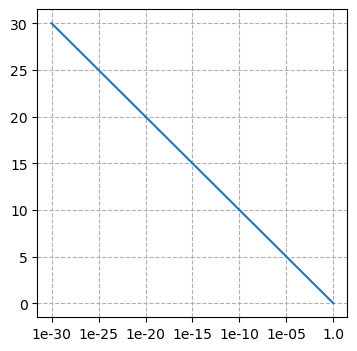

In [17]:
fuja = plt.figure(figsize= (4,4))
da=np.logspace(-30,0)
plt.plot(np.linspace(-30,0),-np.log10(da))
plt.xticks(np.linspace(-30,0,7),10**np.linspace(-30,0,7))
plt.grid(linestyle='--');

**Пример 7.** Испитаћемо који је разломак боља апроксимација броја $\pi:$ $\dfrac{355}{113}\,,\dfrac{22}{7}\,,3.141=\dfrac{3141}{1000}\,.$ Даћемо процену броја сигурних цифара сваке од апроксимација.

In [18]:
a , b , c=355/113 , 22/7 , 3.141
a ,b ,c

(3.1415929203539825, 3.142857142857143, 3.141)

In [19]:
'{:%}'.format((a-np.pi)/np.pi*100) , '{:%}'.format((b-np.pi)/np.pi*100) , '{:%}'.format(np.abs(c-np.pi)/np.pi*100)

('0.000849%', '4.024994%', '1.886475%')

Потражимо сигурне цифре.

In [20]:
-np.log10((a-np.pi)/np.pi) , -np.log10((b-np.pi)/np.pi) , -np.log10(np.abs(c-np.pi)/np.pi)

(7.071022343505276, 3.3952347251747166, 3.7243489533611847)

Закључујемо да је први разломак најбоља апроксимација са 7 сигурних цифара и најмањом релативном грешком.

***

**Пример 8.** Посматрамо поново одузимање два блиска броја $1.32123-1.32078$ дата са $6$ значајних цифара. Резултат одузимања је $1.32123-1.32078=0.00045=45e-5$ па је број са 2 заначајне цифре. Видимо озбиљан губитак значајних цифара приликом извођења операције.

In [21]:
np.round(1.32123-1.32078 , 5)

0.00045

Потражимо и релативну грешку овог резултата како бисмо одредили сигурне цифре. Претпоставка је да операнди долазе са границом апсолутне грешке $0.5\cdot 10^{-6}.$

In [22]:
x , y=1.32123 , 1.32078
raz=x-y
Delta=1e-5  #0.5е-6+0.5е-6
delta=raz/(raz-Delta)*100
-np.log10(delta)

-2.0097598372891596

Закључујемо да резултат нема сигурних цифара. Овај губитак значајних и сигурних цифара можемо и графички да уочимо. 

Позната је гранична вредност $\displaystyle\lim_{x\to0}\dfrac{e^x-1}{x}=1.$ Потражићемо графике функција $f_1(x)=\dfrac{e^x-1}{x}\,$ и $f_2(x)=\dfrac{e^x-1}{x}-1$ на сегменту $[-1e-8,1e-8].$ 

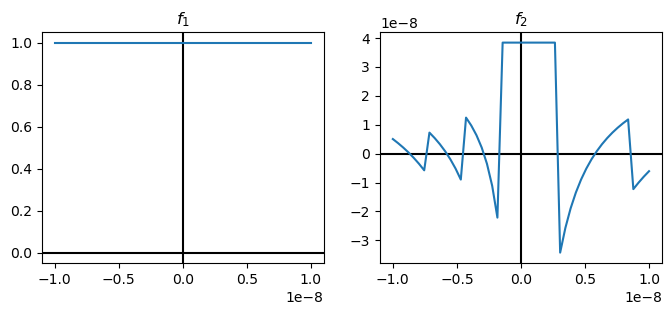

In [23]:
x=np.linspace(-1e-8,1e-8)
y1=(np.exp(x)-1)/x
y2=(np.exp(x)-1)/x-1
slika=plt.figure(figsize=(8,3))

slika.add_subplot(1,2,1)
plt.title('$f_1$')
plt.plot(x,y1)
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)

slika.add_subplot(1,2,2)
plt.title('$f_2$')
plt.plot(x,y2)
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

Видимо да губитак значајних и сигурних цифара доводи до тога да график глатке функције не изгледа глатко.

***

**Пример 9.** Реалан број $a$ представљен је приближно као $x=0.6032$ при чему релативна грешка износи $0.1\%.$ Наћи $a.$ Да ли је решење јединствено? Са колико значајних и сигурних цифара је дата ова апроксимација?

Како је $x=a(1\pm \delta_a)$ то је $a=\dfrac{x}{1\pm \delta_a}$ па решење није јединствено. Апроксимација $x=0.6032=6.032\cdot10^{-1}$ има $4$ значајне цифре.

In [24]:
delta=0.1/100
x=0.6032
a=x/(1+delta)
a

0.6025974025974026

In [25]:
a=x/(1-delta)
a

0.6038038038038037

In [26]:
-np.log10(delta)  #broj sigurnih cifara

3.0

Резултати вредности $a$ и броја сигурних цифара говоре да апроксимација има две тачне цифре, и да је трећа резултат заокруживања.

***

**Пример 10.** Потражимо границе грешака у производу бројева $600$ и $0.007.$ Претпоставка је да су грешке улазних података последица заокруживања.

In [27]:
x , y= 600,0.007
Da , Db=0.5 , 5e-4  #granice apsolutnih gresaka ulaza
Delta=(x+Da)*Db+(y+Db)*Da+Da*Db  #granica apsolutne greske proizvoda
Delta

0.30424999999999996

In [28]:
xy=x*y
xy

4.2

Закључујемо да се права вредност производа налази у интервалу:

In [29]:
xy-Delta,xy+Delta

(3.89575, 4.50425)

Уколико потражимо границу релативне грешке по принципу максимума функције, добијамо:

In [30]:
Delta/(x*y-Delta)

0.0780979272283899

Потражимо границу релативне грешке на основу апроксимације $\delta_{a\cdot b}\approx\delta_a+\delta_b.$

In [31]:
delta=(Da/(x-Da)+Db/(y-Db))
delta

0.07775710528004105

Примећујемо блиске резултате у два поступка одређивања границе релативне грешке. Број значајних цифара сада је:

In [32]:
-np.log10(delta)

1.1092599155754181

***

Претходни примери помажу нам да уочимо на неке опасне моменте аритметике у коначној прецизности.
Опасне операције у коначној прецизности су оне при којима долази до губитка значајних цифара, или оне које уносе грешке истог реда величине као што су и сами резултати и операнди. Излазе оваквих операција карактеришу велике релативне грешке. У опасне операције спадају:
- дељење бројем блиским нули
- одузимање блиских вредности
- сабирање великих бројева истог знака 
- множење великих бројева 
- сабирање бројева са великим међусобним распоном у редовима величине

**Пример 11.** Збир бројева $1e12$ и $1e-5$ неће бити регистрован у покретном зарезу. Чак и ако ову операцију поновимо мнооого пута. 

In [33]:
a=1e12
for i in range(10**6):
    a+=1e-5
a    

1000000000000.0

Грешку резултата можемо да видимо на наредној суми. Променом редоследа израчунавања утицали смо на добијање тачнијег резултата.

In [34]:
a=0.
for i in range(10**6):
    a+=1e-5
a+=1e12  
a

1000000000010.0

Да је проблем грешке израчунавања заиста у реду величина видимо и у следећем резултату.

In [35]:
a=1e11
for i in range(10**6):
    a+=1e-5
a    

100000000015.25879

***

Операција сабирања у аритметици коначне прецизности видимо да не поседује особине комутативности или асоцијативности. То ћемо да потврдимо и кроз израчунавање акумулације неких вредности.

In [36]:
from timeit import default_timer as timer

**Пример 12.** Упоредићемо резултате сабирања исте суме $S=\displaystyle{\sum_{i=1}^{100000}}\frac1i $ на три различита начина.

In [37]:
s=0
S=0
maks=100001
start = timer()
for i in range(1,maks):
    S+=1.0/i
end = timer()
print(end - start) # Vreme je izraženo u sekundama     

start = timer()
for i in range(maks-1,0,-1):
    s+=1.0/i
end = timer()
print(end - start) # Vreme je izraženo u sekundama 

start = timer()
Sdc=np.sum(1/np.arange(1,maks)) 
end = timer()
print(end - start) # Vreme je izraženo u sekundama 

S-s, S-Sdc, s-Sdc

0.02496420000170474
0.03076879999935045
0.0007751999983156566


(-7.283063041541027e-14, -9.769962616701378e-14, -2.4868995751603507e-14)

In [38]:
S , s, Sdc

(12.090146129863335, 12.090146129863408, 12.090146129863433)

Покушајте да одгонетнете разлог постојања два различита резултата. Ком резултату највише верујете? Који је поступак најбржи?

<div class="alert alert-block alert-info">
<b>Напомена:</b> У раду са реалним бројевима углавном треба избегавати оператор испитивања једнакости <b>==</b> и његове еквиваленте. Уместо тога користити операторе поређења који подразумевају одређену толеранцију у одступању вредности. То је један од садржаја радне свеске 05Logicke promenljive i operatori. </div>

***

## Карактеристике нумеричких типова у Python-у

Представљање реалних бројева на рачунару, као и ефикасна израчунавања над њима неопходна су у многим областима науке, инжењерства, финансија, итд. Представљање бројева у меморији рачунара користи коначан број меморијских позиција. Самим тим вредности представљене у меморији рачунара најчешће су само апроксимације стварних вредности. 
Још од најранијег доба израчунавања на електронским машинама предложени су многи различити начини представљања реалних бројева. Па ипак, бројеви у покретном зарезу и аритметика над њима су далеко највише примењивани. Симулација бесконачног континуалног скупа реалних бројева помоћу коначног скупа представивих бројева на рачунару је захтеван задатак који није без недостатака. Није могуће задржати све особине аритметике реалних бројева. Осим тога, неопходан је добар компромис између тачности резултата и брзине поступка израчунавања који подразумева задатке као што су динамички опсег вредности, једноставност имплементације, меморијска цена. Аритметика у покретном зарезу, уз адекватан избор параметара (база бројног система, дужина експонента и мантисе) испоставила се као добар одговор на постављени задатак у већини нумеричких примена.

**Пример 13.** Скуп представивих бројева има две веома битне границе: 
- Најмања позитивна вредност која се региструје као ненула вредност. Сви позитивни бројеви мањи од те границе третирају се као нула. Кажемо да производе поткорачење вредности. 
- Максимална позитивна вредност која може да се представи у меморији рачунара. Сви бројеви већи од ње представљају прекорачење скупа представивих бројева.

<div>
   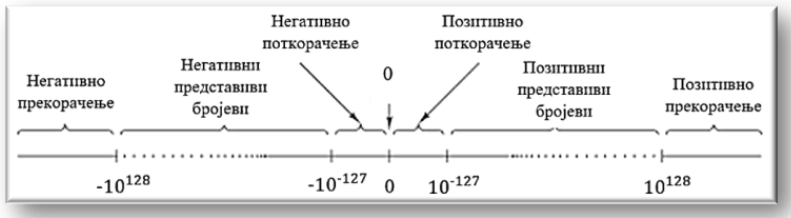
</div>

И поткорачење и прекорачење производе грешке које су истог реда величине као и саме апроксимиране вредности. 

Границе представивих бројева на рачунару су симетричне или скоро симетричне за негативне бројеве. Због тога одузимање блиских бројева, сабирање великих бројева истог знака, множење великих бројева или дељење бројем блиским нули може у резултат да унесе грешке резултата које су истог реда величине као и сами резултати, тј. велике релативне грешке

***

У вези границе релативне грешке уграђене аритметике рачунара и представивих бројева је појам [машинско епсилон](https://en.wikipedia.org/wiki/Machine_epsilon), у ознаци $\varepsilon_M.$  Према стандарду који користи Python машинско епсилон представља размак између броја $1$ и првог већег представивиог броја на рачунару. 

Означимо са $fl(a)$ приближну вредност броја $a\in\mathbb{R}$ приликом његовог представљања на рачунару, тј. апроксимацију у скупу представивих бројева. 

<div>
   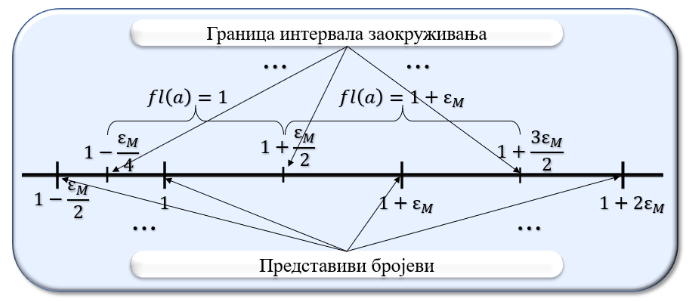
</div>

Машинско епсилон $\varepsilon_M>0$ је најмањи број $\varepsilon>0$ за који је $fl(1+\varepsilon)=1+\varepsilon,$ 
$$\varepsilon_M=\min\big\{\varepsilon>0\ |\ fl(1+\varepsilon)=1+\varepsilon\big\}
=\min\big\{fl(1+\varepsilon)-1>0\ |\ \varepsilon>0\big\}.$$
Закључујемо да, када се примењује правило заокруживања на најближу вредност, за све $\varepsilon>\dfrac{\varepsilon_m}2$ је $fl(1+\varepsilon)>1.$
Због тога што је правило: 
$$\begin{cases}
0<\varepsilon<\dfrac{\varepsilon_M}{2}\quad\Longrightarrow\quad fl(1+\varepsilon)=1, \\[10pt]   
\dfrac{\varepsilon_M}{2}\leq\varepsilon\leq\varepsilon_M\quad
\Longrightarrow
\quad fl(1+\varepsilon)=1+\varepsilon_M,
\end{cases}
$$ 
ову границу $\dfrac{\varepsilon_M}{2}$ називамо још и јединична грешка заокруживања.

Машинско епсилон зависи од радне прецизности машине, тј. од броја резервисаних позиција за цифре мантисе. Наредном табелом дате су вредности машинског епсилон за IEEE стандард неких радних прецизности које су најчешће у примени. 

|oznaka IEEE 754 - 2008 |    standardni naziv | $\varepsilon_M$|
|:---|:---|:---:|
| binary16|  half precision| $2^{-10}\approx9.77e-04$|
|binary32| single precision| $2^{-23}\approx1.19e-07$|
| binary64| double precision| $2^{-52}\approx2.22e-16$|

Иначе, за бројни систем са базом $2$ који користи $p$ цифара нормализоване мантисе (радна прецизност машине), машинско епсилон је вредност $\varepsilon_M=2^{-(p-1)}=2^{-p+1}.$ Јединична грешка заокруживања том приликом износи $\dfrac{\varepsilon_M}{2}=2^{-p}.$

**Пример 14.**  За број $a>0$ и његово приближно представљање у меморији рачунара $fl(a),$ разлика $\Delta a=|fl(a)-a|$ је апсолутна грешка заокруживања на најближи представив број. Уколико је $fl(a)=mantisa\cdot2^{m}$ и користи $p$ цифара нормализоване мантисе, тада је размак између $fl(a)$ и прве суседне представиве вредности $b>fl(a)$ једнак $\varepsilon_M\cdot2^{m}.$ Сходно томе лева граница бројева који се заокружују на број $1$ је $\dfrac{\varepsilon_M}{4},$
$$\sup\big\{\varepsilon>0\ |\ fl(1-\varepsilon)=1\big\}=\dfrac{\varepsilon_M}{2}\cdot2^{-1}=\dfrac{\varepsilon_M}{4}.$$

***

Претходни пример помаже да разумемо: приликом заокруживања на најближу вредност границу грешке је $\Delta a\leq\dfrac{\varepsilon_M}2\cdot2^{m}.$ Тада за релативну грешку апроксимације $\delta a=\dfrac{\Delta a}{|a|},$  за $a\neq0,$  важи
$$\dfrac{\Delta a}{|a|}\leq\dfrac{\dfrac{\varepsilon_M}2\cdot2^{m}}{\inf\{x>0\ |\ fl(x)=mantisa\}\cdot2^{m}}\leq
\dfrac{\dfrac{\varepsilon_M}2}{mantisa-\dfrac{\varepsilon_M}2}\leq \varepsilon_M\,.$$ 
Дакле, машинско епсилон је граница релативне грешке заокруживања приликом представљања бројева у коначној прецизности. Због тога машинско епсилон има битно место у тестовима ваљаности нумеричких поступака израчунавања.

Подразумевани формат приказа реалних бројева у Python-у користи двоструку прецизност IEEE 754-2008 стандарда. Напомињем да је у међувремену (2019) урађена још једна ревизија овог стандарда [IEEE 754-2019](https://standards.ieee.org/ieee/754/6210/).

In [39]:
type(0.1)  #tip objekta

float

То подразумева употребу 64 бита за смештај броја, од чега је $10+1$ битова резервисано за експонент и $52+1$ бита за мантису. Карактеристике овакве меморијске употребе могу да се прочитају из тупл објекта `sys.float_info`.

In [40]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Појединачним информацијама из овог објекта приступамо кроз имена атрибута. Тако су максимална и минимална представива вредност, као и машинско епсилон дати излазом следеће кодне ћелије.

In [41]:
sys.float_info.max  ,  sys.float_info.min , sys.float_info.epsilon

(1.7976931348623157e+308, 2.2250738585072014e-308, 2.220446049250313e-16)

Број битова мантисе је атрибут `mant_dig`. Карактеристике експонента се препознају кроз атрибуте `max_exp`, `max_10_exp`, `min_exp` , `min_10_exp`. Имена и описи атрибута дати су наредном табелом.

|име атрибута |значење |
|---|---|
|dig|број декадних цифара којима можемо да верујемо у приказу броја|
|radix|основа у којој се број представља у меморији рачунара, тј. $2$|
|max_exp|највећи природан број $n$ за који је $2^{n-1}$ представив|
|max_10_exp|највећи природан број $n$ за који је $10^{n}$ представив|
|min_exp|најмањи цео број $n$ за који је $2^{n-1}$ представив са нормализованом мантисом |
|min_10_exp|најмањи цео број $n$ за који је $10^{n}$ представив са нормализованом мантисом| 
|rounds|ознака правила заокруживања (ка најближем)|

In [42]:
sys.float_info.mant_dig , sys.float_info.max_exp 

(53, 1024)

In [43]:
sys.float_info.max_10_exp , np.log10(float(2**1023))

(308, 307.95368556425274)

In [44]:
sys.float_info.dig

15

In [45]:
'{:.16f}'.format(0.1+0.2)

'0.3000000000000000'

In [46]:
'{:.20f}'.format(0.1+0.2)

'0.30000000000000004441'

Сличне информације можемо да добијемо о целобројном типу податка [int](https://python.readthedocs.io/en/latest/library/sys.html#sys.int_info).

In [47]:
type(23) , sys.getsizeof(23) , sys.getsizeof(11112223)  # velicina objekta u bajtovima

(int, 28, 28)

In [48]:
sys.int_info

sys.int_info(bits_per_digit=30, sizeof_digit=4, default_max_str_digits=4300, str_digits_check_threshold=640)

In [49]:
sys.maxsize , sys.getsizeof(sys.maxsize), type(sys.maxsize)  #maksimalna vrednost koju promenljiva moze da ima

(9223372036854775807, 36, int)

In [50]:
2**63-1 , 2**31-1

(9223372036854775807, 2147483647)

In [51]:
type(True)

bool

In [52]:
sys.getsizeof(True)  #broj bitova za smestaj

28

In [53]:
sys.getsizeof(False) #broj bitova za smestaj

28

In [54]:
sys.getsizeof(1) , sys.getsizeof(1.1)

(28, 24)

In [55]:
sys.getsizeof(0) , sys.getsizeof(0.1)

(28, 24)

In [56]:
sys.getsizeof(np.array([True])) , sys.getsizeof(np.array([1])) , sys.getsizeof(np.array([1.1]))

(113, 116, 120)

In [57]:
sys.getsizeof(np.array([False])) , sys.getsizeof(np.array([0])) , sys.getsizeof(np.array([-0.2]))

(113, 116, 120)

***

## Карактеристике нумеричких типова у NumPy-у

Карактеристике нумеричких вредности у покретном зарезу у Python NumPy модулу део су класе [finfo](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html). Карактеристикама нумеричких података приступа се кроз атрибуте ове класе.
```python
 numpy.finfo(dtype).ime_atributa
```

|име атрибута | информација која се добија |
|---|---|
|bits|меморијски простор предвиђен за смештај бројева формата dtype|
|nexp|укупан број битова у експоненту формата dtype|
|nmant| број битова мантисе формата dtype|
|max|највећи представиви број формата dtype|
|min|најмањи представиви број формата dtype (-max)|
|maxexp|најмањи позитиван експонент у бази $2$ који изазива прекорачење формата dtype|
|minexp| најнегативнији експонент у бази $2$ који одговара нормализованој мантиси|
|eps| машинско епсилон $\varepsilon_M$ формата dtype|
|machep|експонент којим се добија eps формата dtype|
|epsneg| разлика између броја $1$ и првог мањег представивог броја формата dtype, eps/2|
|negep| експонент којим се добија epsneg формата dtype|
|precision|приближан број децималних цифара за које је формат dtype прецизан|
|resolution|приближан број децималне резолуције формата dtype, $ 10^{-precision}$|
|tiny| најмањи нормализован број формата dtype|

In [58]:
print(np.finfo(np.float16))
print(np.finfo(np.float32))
print(np.finfo(np.float64))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
smallest_normal = 6.10352e-05   smallest_subnormal = 5.96046e-08
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

Machine parameters for float64
---

In [59]:
print(np.finfo(np.complex64))
print(np.finfo(np.complex128))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
------------------

Ознаке типова бројева у покретном зарезу су у складу са меморијом коју заузимају

In [60]:
np.finfo(np.float16).bits , np.finfo(np.float32).bits , np.finfo(np.float64).bits

(16, 32, 64)

Опсег вредности, прекорачење, поткорачење и машинско епсилон зависе од меморијског простора превиђеног за експонент и мантису. Приказаћемо везу на примеру `float32`.

In [61]:
np.finfo(np.float32).nexp , np.finfo(np.float32).nmant

(8, 23)

In [62]:
np.finfo(np.float32).maxexp , 2**7, np.finfo(np.float32).machep , np.finfo(np.float32).eps , 2**(-23)

(128, 128, -23, 1.1920929e-07, 1.1920928955078125e-07)

In [63]:
np.finfo(np.float32).min , np.finfo(np.float32).max  , '{:e}'.format(2**128)

(-3.4028235e+38, 3.4028235e+38, '3.402824e+38')

Слично можемо да урадимо и за остале типове бројева у покретном зарезу.

In [64]:
np.finfo(np.float64).min , np.finfo(np.float64).max , np.finfo(np.float64).maxexp , '{:e}'.format(2**1023)

(-1.7976931348623157e+308, 1.7976931348623157e+308, 1024, '8.988466e+307')

In [65]:
2**1024

179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216

In [66]:
'{:e}'.format(2**1024)  #dovodi do prekoracenja

OverflowError: int too large to convert to float

Машинско епсилон за реалне бројеве приказано је за три типа.

In [67]:
np.finfo(np.float16).eps , np.finfo(np.float32).eps , np.finfo(np.float64).eps

(0.000977, 1.1920929e-07, 2.220446049250313e-16)

In [68]:
np.finfo(np.float16).machep , np.finfo(np.float32).machep , np.finfo(np.float64).machep

(-10, -23, -52)

In [69]:
2**(-10) , 2**(-23) , 2**(-52)

(0.0009765625, 1.1920928955078125e-07, 2.220446049250313e-16)

Сходно томе број сигурних цифара у декадном запису бројева одговарајућег формата је:

In [70]:
-np.log10(2**(-10)) , -np.log10(2**(-23)) , -np.log10(2**(-52))

(3.010299956639812, 6.923689900271567, 15.653559774527022)

In [71]:
np.finfo(np.float16).precision, np.finfo(np.float32).precision , np.finfo(np.float64).precision

(3, 6, 15)

Треба повести рачуна у раду са бројевима близу прекорачења

In [72]:
x=np.array([-1234.5])
1/(1+np.exp(-x))

C:\Users\jovan\AppData\Local\Temp\ipykernel_8024\1819575003.py:2: RuntimeWarning: overflow encountered in exp
  1/(1+np.exp(-x))


array([0.])

In [73]:
x=np.array([2**24],np.float32)
x

array([16777216.], dtype=float32)

In [74]:
x+1

array([16777216.], dtype=float32)

In [75]:
2**24 , 2**24+1

(16777216, 16777217)

Поред наведених атрибута, функција `numpy.spacing(x)` враћа растојање броја $x$ од првог већег (по апсолутној вредности) представивог броја. Растојање константи $\pm$`inf` и `NaN` износи `NaN`.

In [76]:
np.spacing(1) , np.finfo(np.float64).eps

(2.220446049250313e-16, 2.220446049250313e-16)

In [77]:
np.spacing(-1) , np.finfo(np.float64).eps

(-2.220446049250313e-16, 2.220446049250313e-16)

In [78]:
np.spacing(10) , 10+np.spacing(10) , np.spacing(10)/10 , np.finfo(np.float64).eps

(1.7763568394002505e-15,
 10.000000000000002,
 1.7763568394002506e-16,
 2.220446049250313e-16)

Функција `numpy.nextafter(x1,x2)` враћа наредну представиву вредност у односу на x1 према x2. Функција делује над низовима члан-по-члан. Враћа скалар уколико су x1 и x2 скалари.

In [79]:
np.nextafter(1,0) , np.nextafter(1,0)-1 , np.finfo(np.float64).epsneg

(0.9999999999999999, -1.1102230246251565e-16, 1.1102230246251565e-16)

In [80]:
np.nextafter(-1,0) , np.nextafter(-1,0)-(-1) , np.finfo(np.float64).epsneg

(-0.9999999999999999, 1.1102230246251565e-16, 1.1102230246251565e-16)

Карактеристике целобројних вредности у покретном зарезу у Python-у део су класе [iinfo](https://numpy.org/doc/stable/reference/generated/numpy.iinfo.html) модула NumPy. Карактеристикама нумеричких података приступа се кроз атрибуте ове класе.
```python
 numpy.iinfo(dtype).ime_atributa
```

|име атрибута | информација која се добија |
|---|---|
|bits|меморијски простор предвиђен за смештај бројева формата dtype|
|max|највећи представиви број формата dtype|
|min|најмањи представиви број формата dtype (-max-1)|

In [81]:
print(np.iinfo(np.int8))
print( np.iinfo(np.uint8))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



In [82]:
print(np.iinfo(np.int16))
print( np.iinfo(np.uint16))

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------



In [83]:
print(np.iinfo(np.int32))
print( np.iinfo(np.uint32))

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------



In [84]:
print(np.iinfo(np.int64))
print( np.iinfo(np.uint64))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint64
---------------------------------------------------------------
min = 0
max = 18446744073709551615
---------------------------------------------------------------



In [85]:
np.iinfo(np.int32).bits , np.iinfo(np.uint32).bits

(32, 32)

In [86]:
np.iinfo(np.int8).min , np.iinfo(np.int8).max , np.iinfo(np.uint8).min , np.iinfo(np.uint8).max

(-128, 127, 0, 255)

In [87]:
2**7 , 2**8

(128, 256)

Прекорачење доводи до рачунања резултата по модулу.

In [88]:
a=np.array([255,2,35],np.int8)
a+3 , a*2

C:\Users\jovan\AppData\Local\Temp\ipykernel_8024\2135867575.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 255 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  a=np.array([255,2,35],np.int8)


(array([ 2,  5, 38], dtype=int8), array([-2,  4, 70], dtype=int8))

In [89]:
a=np.array([255,2,35],np.uint8)
a+3 , a*2

(array([ 2,  5, 38], dtype=uint8), array([254,   4,  70], dtype=uint8))

***